# **LINEAR REGRESSION**

###### *tek değişkenli*

## Import

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("community_health.csv")

In [85]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27
...,...,...,...,...,...,...
995,43,female,group E,273,68,22
996,34,female,group D,247,76,16
997,54,female,group B,310,75,27
998,38,male,group E,64,75,7


## Veri Hk.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [87]:
df.describe()

,age,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,199.045000,67.300000,19.956000
std,14.839166,52.815077,6.285341,6.455055
min,0.000000,45.000000,46.000000,2.000000
25%,36.000000,165.000000,63.000000,15.000000
50%,45.000000,197.000000,67.000000,20.000000
75%,55.000000,236.000000,72.000000,24.000000
max,89.000000,356.000000,86.000000,40.000000


In [88]:
df.isnull().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

## Veriyi Hazırlama

    Yaş & Visit sayısı arasındaki ilişkiye bakacağız

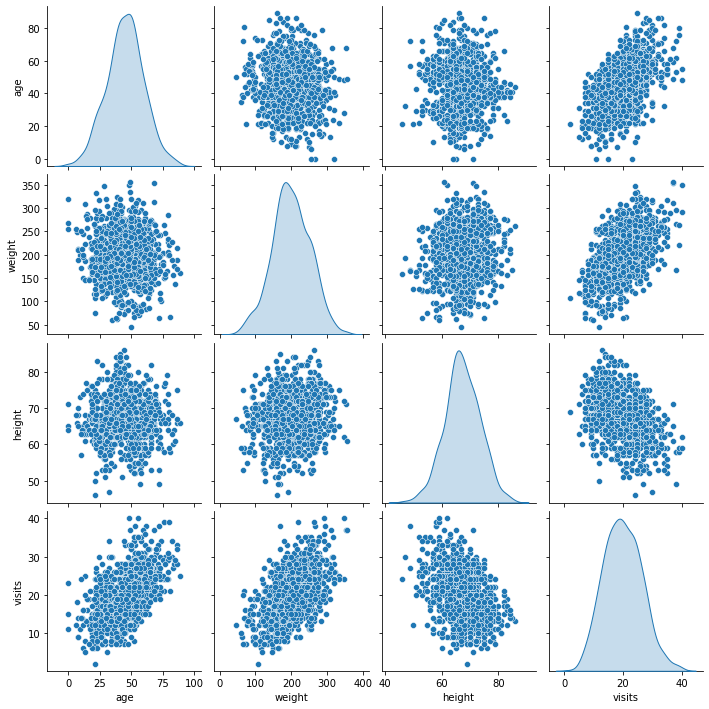

In [89]:
sns.pairplot(df,diag_kind="kde")

## Train Test Split

In [90]:
X = df[["age"]]
y = df["visits"]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# help(train_test_split)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [94]:
X_train.head()

,age
26,45
155,21
872,47
383,64
648,50


In [95]:
y_train.head()

26     18
155     8
872    18
383    20
648    24
Name: visits, dtype: int64

In [96]:
X_test.head()

,age
890,72
983,47
107,16
609,34
113,50


In [97]:
y_test.head()

890    25
983    20
107    19
609    16
113    29
Name: visits, dtype: int64

## Scikit Learn

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
# help(LinearRegression)

In [100]:
regr = LinearRegression()

In [101]:
regr.fit(X_train, y_train)

LinearRegression()

In [102]:
df["age"].corr(df["visits"])

0.5395427263086967

## Performans

In [103]:
test_preds = regr.predict(X_test)

In [104]:
test_preds

array([26.08962087, 20.36064139, 13.25670684, 17.38157206, 21.04811893,
       14.17334356, 15.54829863, 20.58980057, 20.81895975, 18.98568632,
       12.79838848, 18.0690496 , 20.36064139, 21.50643729, 24.25634743,
       18.98568632, 14.63166192, 22.65223318, 25.17298415, 17.83989042,
       17.38157206, 22.19391482, 19.90232303, 20.36064139, 20.81895975,
       21.04811893, 20.58980057, 16.23577617, 21.50643729, 21.73559647,
       17.83989042, 29.29784937, 17.83989042, 21.73559647, 24.71466579,
       19.44400467, 15.08998027, 20.36064139, 20.36064139, 21.50643729,
       17.15241288, 16.69409453, 27.23541676, 19.90232303, 15.54829863,
       20.36064139, 21.04811893, 11.42343341, 22.19391482, 15.77745781,
       21.50643729, 22.19391482, 21.27727811, 17.15241288, 17.83989042,
       22.88139236, 19.44400467, 18.0690496 , 21.04811893, 14.17334356,
       23.5688699 , 18.52736796, 16.23577617, 25.86046169, 20.13148221,
       18.98568632, 18.98568632, 13.94418438, 16.92325371, 20.58

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [106]:
print("Theta :     ", round(regr.coef_[0],2))
print("Intercept : ", round(regr.intercept_,2))
print("R^2 :       ", round(r2_score(y_test,test_preds),2))
print("MAE :       ", round(mean_absolute_error(y_test,test_preds),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,test_preds)),2))

Theta :      0.23
Intercept :  9.59
R^2 :        0.29
MAE :        4.38
RMSE :       5.57


In [107]:
df["visits"].mean()

19.956

In [108]:
df["visits"].std()

6.455054742737022

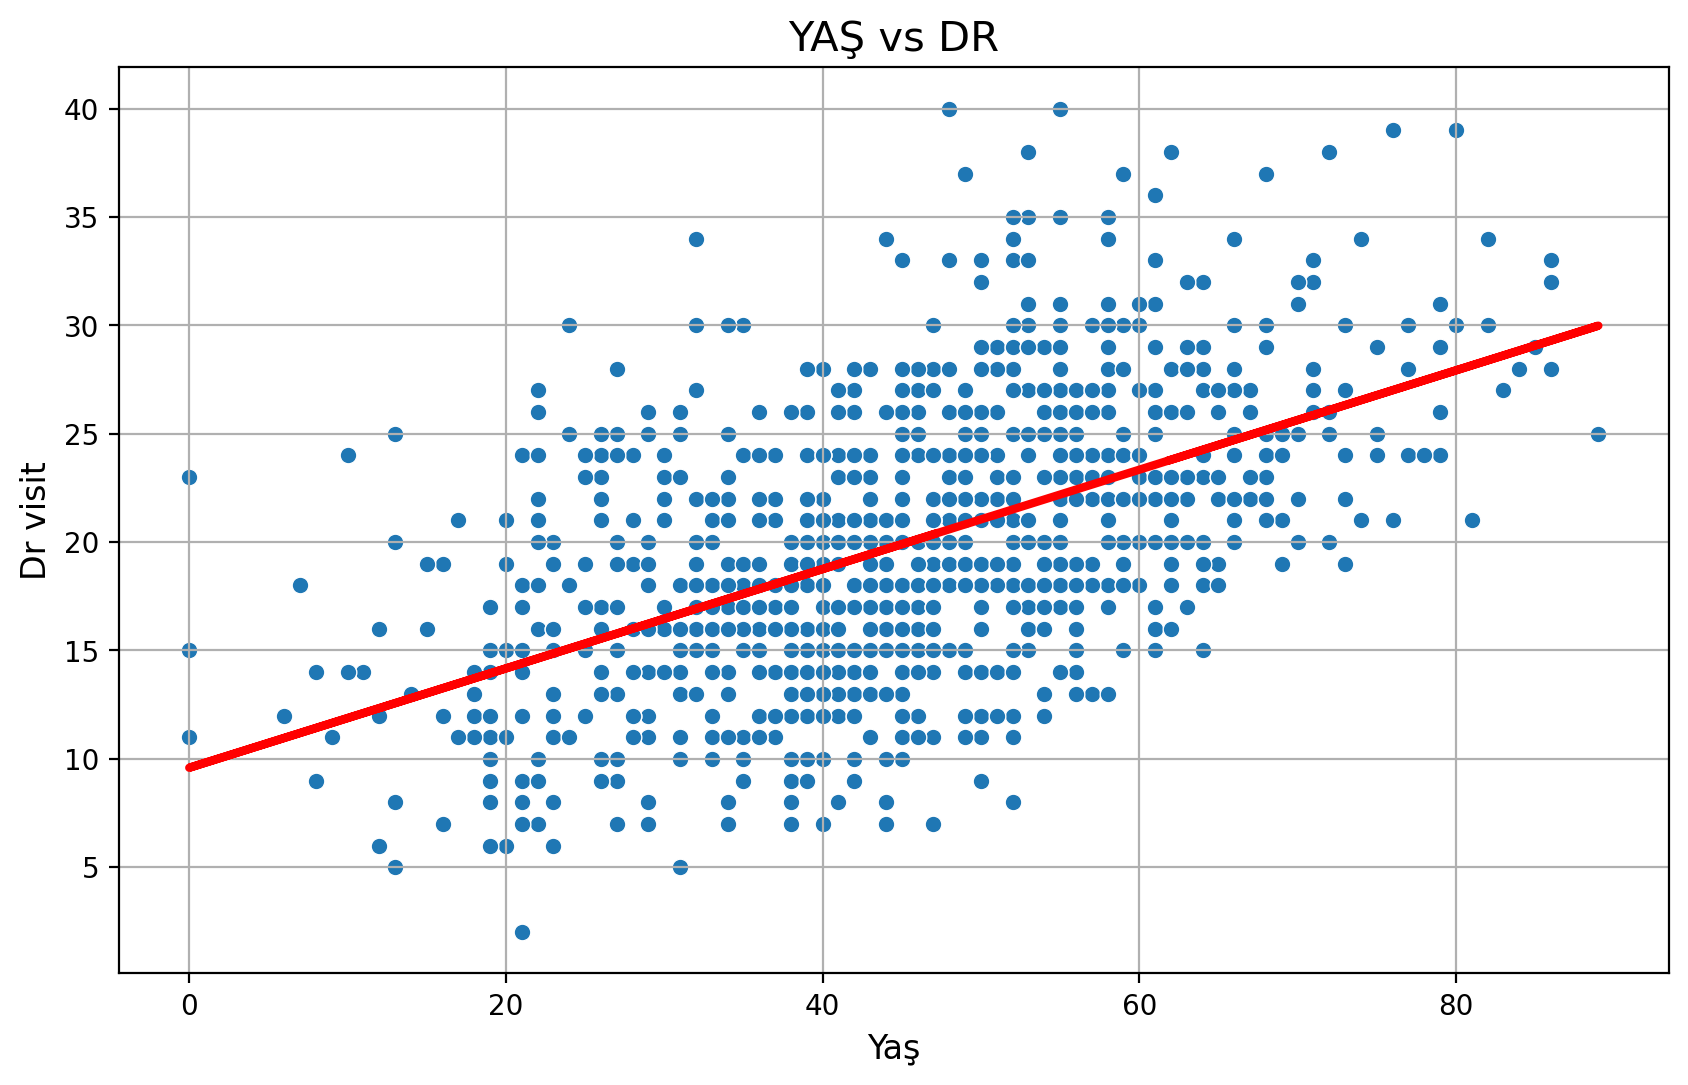

In [109]:
plt.figure(figsize=(10,6), dpi=200)
plt.plot(X, regr.predict(X), color="Red", lw=3)
sns.scatterplot(data=df, x="age", y="visits")

plt.xlabel("Yaş", size=12)
plt.ylabel("Dr visit", size=12)
plt.title("YAŞ vs DR", size=15)
plt.grid(True)

---
---

# **https://youtu.be/hoe24aSvLtw?t=30**